In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\user\Desktop\titanic_dataset .csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

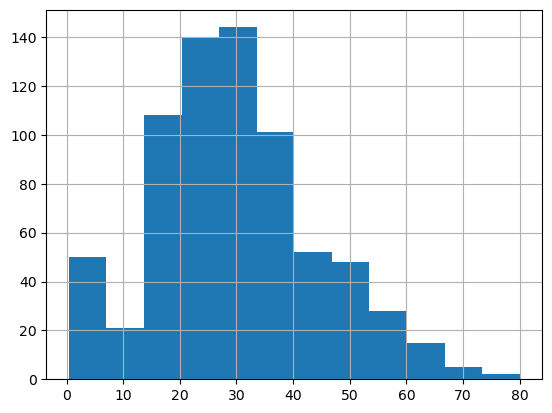

In [7]:
data["Age"].hist(bins=12)
plt.show()

In [8]:
data['Age'].fillna(round(data['Age'].median(),1),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop('Cabin',axis=1,inplace=True)

In [9]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
data = pd.get_dummies(data, columns = ['Sex','Embarked'])

In [11]:
data = data.drop(['Ticket','Name'],axis=1)

In [12]:
#Training the Model
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [13]:
#KNeighbor Classifier
knn = KNeighborsClassifier(n_neighbors=12)
model1 = knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
accuracy_score(y_test,y_pred1)

0.6368715083798883

In [14]:
#SVM Model
from sklearn import svm
svm = svm.SVC(kernel = 'linear')
model2 =svm.fit(X_train,y_train)
y_pred2 = svm.predict(X_test)
accuracy_score(y_test,y_pred2)

0.776536312849162

In [24]:
#Cross Validation
scores_knn = cross_val_score(model1, X_train, y_train, scoring ='r2',cv =5)
scores_knn

array([-0.36870578, -0.39846026, -0.50519398, -0.56540174, -0.5239899 ])

In [25]:
print(np.mean(scores_knn))

-0.4723503318107941


In [23]:
# Cross validation using SVM model

scores_svm = cross_val_score(model2, X_train, y_train, scoring ='r2',cv =5)
scores_svm

array([ 0.16687474,  0.22638369, -0.05363579,  0.00657197,  0.28282828])

In [26]:
print(np.mean(scores_svm))

0.12580457960996433


In [19]:
#Stratified k fold using KNN
from sklearn.model_selection import StratifiedKFold
acc=[]
skf=StratifiedKFold(n_splits=5,random_state=None)
skf.get_n_splits(X_train,y_train)
for tri,tsi in skf.split(X_train,y_train):
    X1_TR,X1_TS=X.iloc[tri],X.iloc[tsi]
    y1_TR,y1_TS=y.iloc[tri],y.iloc[tsi]
    
    model1.fit(X1_TR,y1_TR)
    pred=model1.predict(X1_TS)
    score=accuracy_score(pred,y1_TS)
    acc.append(score)
print(acc)

[0.6433566433566433, 0.7342657342657343, 0.5422535211267606, 0.647887323943662, 0.704225352112676]


In [20]:
print(np.mean(acc))

0.6543977149610952


In [21]:
#Stratified k fold using SVM
acc=[]
skf=StratifiedKFold(n_splits=5,random_state=None)
skf.get_n_splits(X_train,y_train)
for tri,tsi in skf.split(X_train,y_train):
    X1_TR,X1_TS=X.iloc[tri],X.iloc[tsi]
    y1_TR,y1_TS=y.iloc[tri],y.iloc[tsi]
    
    model2.fit(X1_TR,y1_TR)
    pred=model2.predict(X1_TS)
    score=accuracy_score(pred,y1_TS)
    acc.append(score)

print(acc)

[0.8041958041958042, 0.7902097902097902, 0.8098591549295775, 0.7676056338028169, 0.7464788732394366]


In [22]:
print(np.mean(acc))

0.7836698512754852
